In [1]:
from datetime import datetime
from meteostat import Point, Daily
from matplotlib import pyplot as plt
import analyzerdf

In [2]:
samara = Point(53.2, 50.15, 116)
time_start = datetime(2021, 1, 1)
time_end = datetime(2021, 1, 31)

In [3]:
samara_temperature_df = Daily(samara, time_start, time_end).fetch()
samara_temperature_df.dropna(axis='columns', how='all', inplace=True)
samara_temperature_df_analyzer = analyzerdf.Analyzer(samara_temperature_df)
analyzerdf.write_in_excel(samara_temperature_df_analyzer.data_frame, 
                          "standart df")

In [4]:
df_extremums = samara_temperature_df_analyzer.get_extremums()
analyzerdf.write_in_excel(df_extremums, 'extremums')

Text(0.5, 0, 'Даты')

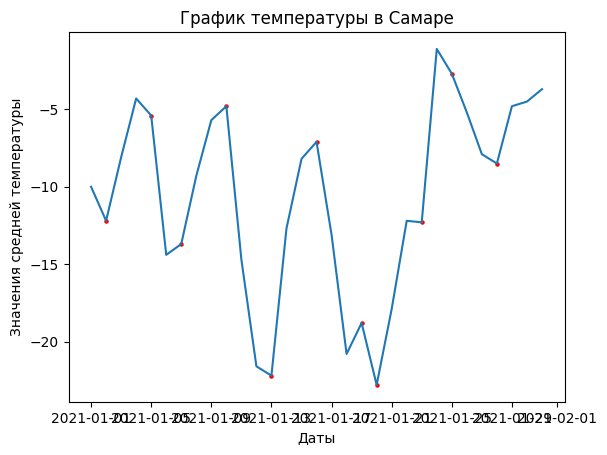

In [5]:
fig1, ax1 = plt.subplots()
ax1.plot(samara_temperature_df_analyzer.data_frame['tavg'])
for i in df_extremums['tavg'].index:
    ax1.scatter(x = i, y = df_extremums['tavg'].at[i], s = 5, c = 'r')
ax1.set_title('График температуры в Самаре')
ax1.set_ylabel('Значения средней температуры')
ax1.set_xlabel('Даты')

In [6]:
df_rolling_meaning = samara_temperature_df_analyzer.get_rolling_meaning(30)
df_rolling_meaning.dropna(axis='rows', how='all', inplace=True)

df_rolling_meaning_analyzer = analyzerdf.Analyzer(df_rolling_meaning)
analyzerdf.write_in_excel(df_rolling_meaning_analyzer.data_frame, "roll mean")

df_rolling_meaning_extremums = df_rolling_meaning_analyzer.get_extremums()
analyzerdf.write_in_excel(df_rolling_meaning_extremums, 
                          "extremums from roll mean")

Text(0.5, 0, 'Даты')

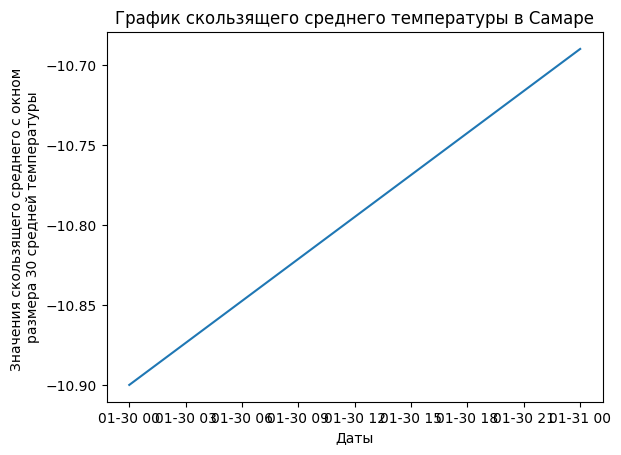

In [7]:
fig2, ax2 = plt.subplots()
ax2.plot(df_rolling_meaning_analyzer.data_frame['tavg'])
for i in df_rolling_meaning_extremums['tavg'].index:
    ax2.scatter(x = i, 
                y = df_rolling_meaning_extremums['tavg'].at[i], 
                s = 5, 
                c = 'r')
ax2.set_title('График скользящего среднего температуры в Самаре')
ax2.set_ylabel('Значения скользящего среднего с окном \n' + 
               'размера 30 средней температуры')
ax2.set_xlabel('Даты')

In [8]:
df_rolling_meaning_diff = df_rolling_meaning_analyzer.get_differential()
analyzerdf.write_in_excel(df_rolling_meaning_diff, "diff from roll mean")

Text(0.5, 0, 'Даты')

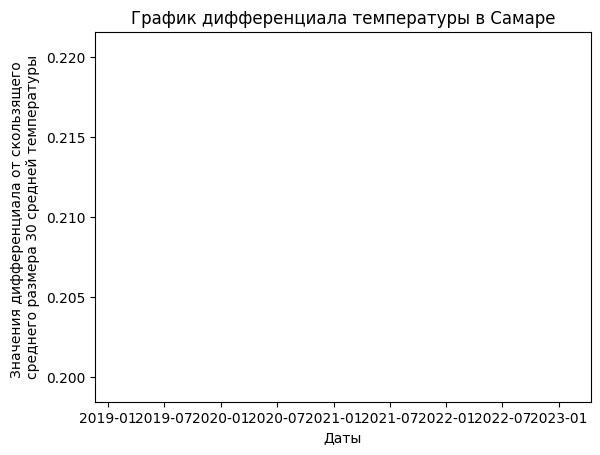

In [9]:
fig3, ax3 = plt.subplots()
ax3.plot(df_rolling_meaning_diff['tavg'])
ax3.set_title('График дифференциала температуры в Самаре')
ax3.set_ylabel('Значения дифференциала от скользящего \n' + 
               'среднего размера 30 средней температуры')
ax3.set_xlabel('Даты')

In [10]:
df_rolling_meaning_autocorr = df_rolling_meaning_analyzer.get_autocorrelation()
df_rolling_meaning_autocorr.dropna(axis='columns', how='all', inplace=True)
analyzerdf.write_in_excel(df_rolling_meaning_autocorr, 
                          "autocorr from roll mean")

[tavg    1.0
tmin    1.0
tmax    1.0
wdir    1.0
wspd    1.0
pres    1.0
dtype: float64, tavg   -0.5
tmin   -0.5
tmax   -0.5
wdir   -0.5
wspd   -0.5
pres   -0.5
dtype: float64]
[tavg    1.0
tmin    1.0
tmax    1.0
wdir    1.0
wspd    1.0
pres    1.0
dtype: float64, tavg   -0.5
tmin   -0.5
tmax   -0.5
wdir   -0.5
wspd   -0.5
pres   -0.5
dtype: float64]
[tavg    1.0
tmin    1.0
tmax    1.0
wdir    1.0
wspd    1.0
pres    1.0
dtype: float64, tavg   -0.5
tmin   -0.5
tmax   -0.5
wdir   -0.5
wspd   -0.5
pres   -0.5
dtype: float64]
[tavg    1.0
tmin    1.0
tmax    1.0
wdir    1.0
wspd    1.0
pres    1.0
dtype: float64, tavg   -0.5
tmin   -0.5
tmax   -0.5
wdir   -0.5
wspd   -0.5
pres   -0.5
dtype: float64]
[tavg    1.0
tmin    1.0
tmax    1.0
wdir    1.0
wspd    1.0
pres    1.0
dtype: float64, tavg   -0.5
tmin   -0.5
tmax   -0.5
wdir   -0.5
wspd   -0.5
pres   -0.5
dtype: float64]
[tavg    1.0
tmin    1.0
tmax    1.0
wdir    1.0
wspd    1.0
pres    1.0
dtype: float64, tavg   -0.5
tmin   -0.5
tm

In [11]:
print(df_rolling_meaning_autocorr['tavg'])
# fig4, ax4 = plt.subplots()
# ax4.plot(df_rolling_meaning_autocorr['tavg'])
# ax4.set_title('График автокорелляции средней температуры в Самаре')
# ax4.set_ylabel('Значения коэффициентов корреляции')
# ax4.set_xlabel('Даты')

time
2021-01-30    tavg    1.0
tmin    1.0
tmax    1.0
wdir    1....
2021-01-31    tavg   -0.5
tmin   -0.5
tmax   -0.5
wdir   -0....
Freq: D, Name: tavg, dtype: object
